Use shift-enter to execute each code cell. Some cells require earlier cells, so run them all. 

In [1]:
# This loads numerous packages and defines functions I used in these notes

%run -i "controls_imports.py"

# Do we really need to see more decimal places. 
%precision 5

## Introduction:

I'm going to start using more coding in class here. Because I can integrate it live with notes, I'll be using Python. Specifically, I'll be using the [Python Control Systems Library](https://python-control.readthedocs.io/en/0.8.3/) with an emphasis on trying to stay within the [MATLAB compatibility module](https://python-control.readthedocs.io/en/0.8.3/matlab.html). This means that much of the syntax will look the same as [Matlab](http://mathworks.com). However, it won't be 100%. Many of the commands will be preceded by ``ctrl.``. This is a python technique that allows the usage of a variable or function name in multiple places. For example, later in the course I will solve for eigenvalues. The Matlab command is ``eig``. However, I might personally want to call my eigenvalue variable ``eig``. You can't do that in Matlab. ``eig`` is already taken. You can "deal with it". In python, however, when I ``import`` (make ready for usage) the ``eig command``, I will do it in the following form:

````
import numpy.linalg as la  # Only has to be done once before using it as many times as wanted.
eig = la.eig(A) # Presuming A has already been defined
````

So, now my eigenvalues are in the variable ``eig``. 

Python is easy enough you will be able to read what I'm doing and understand it. I will comment the code as I think is necessary. If you know Matlab, you will be able to replicate it there just fine. 

I could use Matlab in these notes. However, running Matlab within notebooks takes that much more expertise to get working. Click [how to use Matlab within jupyter notebooks](https://am111.readthedocs.io/en/latest/jmatlab_install.html) is you want to try it. I've done it. I simply know it's unlikely many of you will want to do so, so I'd rather give you code you can run as long as Python is installed (which already had to happen just to *have* this notebook). 

As always, please reach out to me. I'm happy to provide support to get things working. I won't work on getting Matlab working in [jupyter](http://jupyter.org)- it's a bit more fragile and you will have to learn to maintain it. 

The text covers the polynomial tools in Matlab. I placed a module in the public repository illustrating the same in Python. I don't think it's necessary, but if I'm wrong, it is there. 

Here we start with the controls functions. 

In [38]:
num1 = 10
den1 = [1, 2, 5]
sys1 = ctrl.tf(num1, den1)
sys1


      10
-------------
s^2 + 2 s + 5

In [39]:
num2 = 1
den2 = [1, 1]
sys2 = ctrl.tf(num2, den2)
sys2


  1
-----
s + 1

In [40]:
sys1 + sys2


   s^2 + 12 s + 15
---------------------
s^3 + 3 s^2 + 7 s + 5

In [41]:
sys1/sys2


  10 s + 10
-------------
s^2 + 2 s + 5

In [42]:
sys1 - sys2


    -s^2 + 8 s + 5
---------------------
s^3 + 3 s^2 + 7 s + 5

In [49]:
sys = ctrl.tf([1, 10], [1, 2, 1])
p = ctrl.pole(sys)
z = ctrl.zero(sys)
print('Poles: {}   Zeros: {}'.format(p, z))

Poles: [-1. -1.]   Zeros: [-10.]


array([-1., -1.])

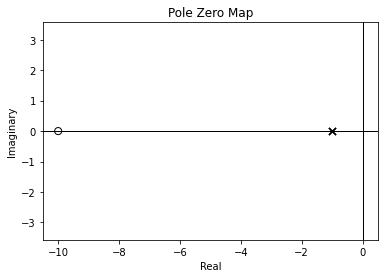

In [51]:
[p, z] = ctrl.pzmap(sys)
p

In [53]:
sysg = ctrl.tf([6, 0, 1],[1, 3, 3, 1])
sysg


      6 s^2 + 1
---------------------
s^3 + 3 s^2 + 3 s + 1

In [61]:
# Since I think flipping polynomials is a mistake waiting to happen, I just defined each portion 
# in the transfer function as one itself, and multiplied and divided them. 
# For instance, the top left portion is
ctrl.tf([1, 1], 1)


s + 1
-----
  1

So:

In [62]:
sysh = ctrl.tf([1, 1], 1)*ctrl.tf([1, 2], 1)/ctrl.tf([1, 2*i], 1)/ctrl.tf([1, -2*i], 1)/ctrl.tf([1, 3], 1)
sysh


    s^2 + 3 s + 2
----------------------
s^3 + 3 s^2 + 4 s + 12

Simpler would have been:

In [78]:
sysh = ctrl.tf([1, 1], [1, 2*i])*ctrl.tf([1, 2], [1, -2*i])/ctrl.tf([1, 3], 1)
sysh


    s^2 + 3 s + 2
----------------------
s^3 + 3 s^2 + 4 s + 12

In [79]:
sys = sysg/sysh
sys


6 s^5 + 18 s^4 + 25 s^3 + 75 s^2 + 4 s + 12
-------------------------------------------
  s^5 + 6 s^4 + 14 s^3 + 16 s^2 + 9 s + 2

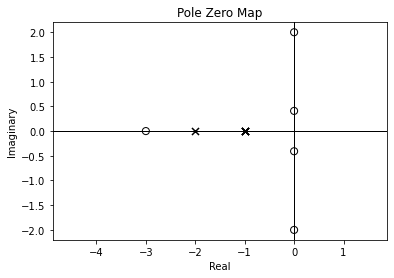

In [80]:
ctrl.pzmap(sys);

In [81]:
sys1*sys2


          10
---------------------
s^3 + 3 s^2 + 7 s + 5

In [82]:
ctrl.series(sys1,sys2)


          10
---------------------
s^3 + 3 s^2 + 7 s + 5